# WElib basic example



In [1]:
from WElib import Walker, FunctionProgressCoordinator, FunctionStepper, StaticBinner, Recycler, SplitMerger
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Walkers do a random walk in 2D. the progress coordinate is distance from the origin. The target value for the pc is 4.0

In [2]:
initial_state = np.array([0.0, 0.0])
target_pc = 4.0
n_walkers = 4

def pc_func(state):
    '''
    Calclate the progress coordinate from the state
    
    '''
    return np.linalg.norm(state)

def stepper_func(state):
    '''
    Take a step, return the new state
    
    '''
    return state + np.random.random(size=2) - 0.5

Create an initial set of walkers

In [8]:
weight = 1.0 / n_walkers
walkers = [Walker(initial_state, weight) for i in range(n_walkers)]

Create the workflow components:

In [13]:
bin_edges = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
stepper = FunctionStepper(stepper_func)
pc = FunctionProgressCoordinator(pc_func)
recycler = Recycler(target_pc)
binner = StaticBinner(bin_edges)
sm = SplitMerger(n_walkers)

Run the WE simulation:

In [14]:
n_cycles = 10000
results = []
for i in range(n_cycles):
    walkers = stepper.run(walkers)
    walkers = pc.run(walkers)
    walkers = recycler.run(walkers)
    flux = recycler.flux
    walkers = binner.run(walkers)
    walkers = sm.run(walkers)
    result = {
        'cycle': i,
        'flux' : flux,
        'n_walkers': len(walkers)
    }
    results.append(result)

Plot the flux:

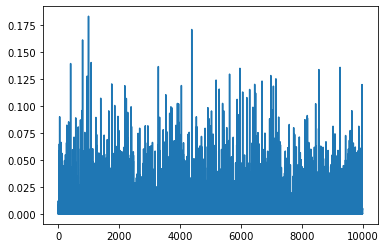

In [15]:
fluxes = [r['flux'] for r in results]
plt.plot(fluxes)

Look at the mean bin weights:

<BarContainer object of 8 artists>

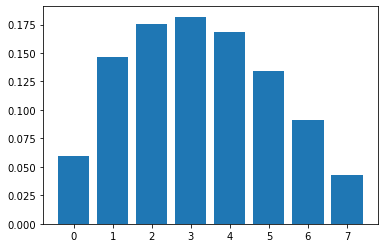

In [19]:
plt.bar(binner.mean_bin_weights.keys(), binner.mean_bin_weights.values())